In [101]:
import pandas as pd
import numpy as np

### DATA loading


In [465]:
#automation for replacing "\" with "/" for python usage 
class data():
    def __init__(self): 
        try:
            self.user_input = input("Enter the path: ")
            self.cleaned = self.user_input.replace("\\", "/").strip('"').strip("'")
            self.raw_data = pd.read_csv(self.cleaned)
            print("Sucessfully loaded")
        except:
            print("Loading unsucessful Enter a valid path")
    
    def load(self):
        return self.raw_data
    
    def fillnone(self):
        threshold = 30.0
        check = self.raw_data.isna().sum()/len(self.raw_data)*100
        for col, nul in check.items():
            if nul < threshold:
                self.raw_data.dropna(inplace=True)
            else:
                print("Need manual intervenation")
        null = self.raw_data.isna().sum()/len(self.raw_data)*100
        print(null)
        print("NA's are sorted sucessfully")
        return self.raw_data


        


In [466]:
df1 = data().fillnone()
df1

Sucessfully loaded
Book Name            0.0
Author               0.0
Rating               0.0
Number of Reviews    0.0
Price                0.0
Description          0.0
Listening Time       0.0
Ranks and Genre      0.0
dtype: float64
NA's are sorted sucessfully


,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."
...,...,...,...,...,...,...,...,...
4459,"Factfulness: Wie wir lernen, die Welt so zu se...",Hans Rosling,4.6,72.0,703,"Sorry, we just need to make sure you're not a ...",-1,-1
4460,Late-Talking Children: A Symptom or a Stage?,Stephen M. Camarata,4.6,92.0,703,"Sorry, we just need to make sure you're not a ...",-1,-1
4461,"The Marketing of Evil: How Radicals, Elitists ...",David Kupelian,4.7,490.0,586,"Americans have come to tolerate, embrace, and ...",-1,-1
4462,Things I Wish I'd Known Before We Got Married,Gary Chapman,4.7,1388.0,516,\n\nOops!\nIt's rush hour and traffic is pilin...,-1,-1


In [499]:
(df1 == "-1").sum()

Book Name               0
Author                  0
Rating                  0
Number of Reviews       0
Price                   0
Description             0
Listening Time       1772
Ranks and Genre      1772
dtype: int64

In [501]:
#replacing the -1's with Nan to handle them later 
for col in ["Listening Time","Ranks and Genre"]:
    df1[col] = df1[col].replace("-1",np.nan)


#check the Nan's
df1.isna().sum()

Book Name               0
Author                  0
Rating                  0
Number of Reviews       0
Price                   0
Description             0
Listening Time       1772
Ranks and Genre      1772
dtype: int64

In [467]:
#loading second data 
df2=data().fillnone()
df2

Sucessfully loaded
Book Name            0.0
Author               0.0
Rating               0.0
Number of Reviews    0.0
Price                0.0
dtype: float64
NA's are sorted sucessfully


,Book Name,Author,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0
...,...,...,...,...,...
6362,"False Gods: The Horus Heresy, Book 2",Graham McNeill,4.7,299.0,1138.0
6363,The Hot Flash Club,Nancy Thayer,4.3,191.0,1131.0
6364,The Prophet & The Wanderer,Khalil Gibran,4.1,6.0,539.0
6365,Make Today Count: The Secret of Your Success I...,John C. Maxwell,4.7,301.0,500.0


In [476]:
#REMOVING THE DUPLICATES FROM THE DATA:

df1[df1.duplicated(subset=["Book Name"], keep=False)]

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
5,sapiens,yuval noah harari,4.6,20163.0,1093,fire gave us power. farming made us hungry for...,15 hours and 18 minutes,",#4 in Audible Audiobooks & Originals (See Top..."
45,think and grow rich,napoleon hill,4.5,22448.0,166,by completing your purchase you agree to audib...,10 hours and 15 minutes,",#38 in Audible Audiobooks & Originals (See To..."
73,sapiens,yuval noah harari,4.6,329.0,1171,new york times best seller,21 hours and 42 minutes,",#72 in Audible Audiobooks & Originals (See To..."
255,war and peace,leo tolstoy,4.2,102.0,1406,"often called the greatest novel ever written, ...",61 hours and 6 minutes,",#440 in Audible Audiobooks & Originals (See T..."
383,the game,neil strauss,4.3,1611.0,797,the game recounts the incredible adventures of...,9 hours and 27 minutes,",#927 in Audible Audiobooks & Originals (See T..."
...,...,...,...,...,...,...,...,...
4443,destroying fear: strategies to overthrow the e...,john ramirez,4.9,422.0,586,oops!\nit's rush hour and traffic is piling up...,-1,-1
4445,enterprise agility: being agile in a changing ...,sunil mundra,5.0,10.0,703,"sorry, we just need to make sure you're not a ...",-1,-1
4446,the sailor who fell from grace with the sea,yukio mishima,4.5,235.0,501,"sorry, we just need to make sure you're not a ...",-1,-1
4447,big maria,johnny shaw,4.4,586.0,603,"sorry, we just need to make sure you're not a ...",-1,-1


In [480]:
df2[df2.duplicated(subset=["Book Name"], keep=False)]

,Book Name,Author,Rating,Number of Reviews,Price
6,sapiens,yuval noah harari,4.6,19994.0,1093
45,think and grow rich,napoleon hill,4.5,22330.0,166
93,sapiens,yuval noah harari,4.6,329.0,1171
917,the wealth of nations,adam smith,4.7,15.0,2847
927,"the blood of olympus: heroes of olympus, book 5",rick riordan,4.6,5722.0,888
...,...,...,...,...,...
6361,the death of wcw,r.d. reynolds,4.6,271.0,836
6362,"false gods: the horus heresy, book 2",graham mcneill,4.7,299.0,1138
6364,the prophet & the wanderer,khalil gibran,4.1,6.0,539
6365,make today count: the secret of your success i...,john c. maxwell,4.7,301.0,500


In [483]:
for df in [df1, df2]:
    df.drop_duplicates(subset=["Book Name"], keep="first", inplace=True)

In [ ]:
#standardizing the columns for better merging 
for df in [df1, df2]:
    df["Book Name"] = df["Book Name"].str.strip().str.lower()
    df["Author"] = df["Author"].str.strip().str.lower()
    df["Price"] =df["Price"].astype(int)

In [487]:
df1["Description"] =df1["Description"].str.strip().str.lower()

In [488]:
#merging both the data's

merged = pd.merge(df1, df2, on=["Book Name","Author","Price"], how="outer", suffixes=("_A", "_B"))
merged

,Book Name,Author,Rating_A,Number of Reviews_A,Price,Description,Listening Time,Ranks and Genre,Rating_B,Number of Reviews_B
0,"""don't you know who i am?"": how to stay sane i...",ramani s. durvasula phd,NaN,NaN,836,NaN,NaN,NaN,4.8,170.0
1,#girlboss,sophia amoruso,4.5,2272.0,615,"sorry, we just need to make sure you're not a ...",-1,-1,4.5,2260.0
2,#therealcinderella: #bestfriendsforever series...,yesenia vargas,4.3,179.0,586,oops!\nit's rush hour and traffic is piling up...,-1,-1,4.3,179.0
3,10 essential success mantras from the bhagavad...,vimla patil,4.2,45.0,233,"for thousands of years, the bhagavad gita has ...",26 minutes,",#3,076 in Audible Audiobooks & Originals (See...",4.2,45.0
4,10 judgements that changed india,zia mody,NaN,NaN,502,NaN,NaN,NaN,4.4,221.0
...,...,...,...,...,...,...,...,...,...,...
5472,zodiac: the shocking true story of the nation'...,robert graysmith,NaN,NaN,702,NaN,NaN,NaN,4.3,178.0
5473,zog,julia donaldson,4.9,2251.0,190,zog is the keenest dragon in school. he's also...,28 minutes,",#1,966 in Audible Audiobooks & Originals (See...",NaN,NaN
5474,zone to win: organizing to compete in an age o...,geoffrey a. moore,NaN,NaN,586,NaN,NaN,NaN,4.4,104.0
5475,zoology: understanding the animal world,donald e. moore,NaN,NaN,1171,NaN,NaN,NaN,1.0,1.0


In [489]:
#checking duplicates 
merged[merged.duplicated(subset=["Book Name", "Author"], keep=False)]

,Book Name,Author,Rating_A,Number of Reviews_A,Price,Description,Listening Time,Ranks and Genre,Rating_B,Number of Reviews_B
1962,julius caesar,william shakespeare,4.5,227.0,233,"sorry, we just need to make sure you're not a ...",-1,-1,NaN,NaN
1963,julius caesar,william shakespeare,NaN,NaN,422,NaN,NaN,NaN,4.5,225.0
3906,the end of the affair,graham greene,4.1,312.0,558,"sorry, we just need to make sure you're not a ...",-1,-1,NaN,NaN
3907,the end of the affair,graham greene,NaN,NaN,569,NaN,NaN,NaN,4.1,310.0


In [490]:
agg_rules = {"Rating_A": "first",
             "Number of Reviews_A" : "first",
             "Price" : "mean",
             "Description" : "first",
             "Listening Time" : "first",
             "Ranks and Genre" : "first",
             "Rating_B": "first",
             "Number of Reviews_B" : "first"
             }

In [491]:
#removing duplicates
merged = merged.groupby(["Book Name", "Author"], as_index=False).agg(agg_rules)

In [492]:
merged

,Book Name,Author,Rating_A,Number of Reviews_A,Price,Description,Listening Time,Ranks and Genre,Rating_B,Number of Reviews_B
0,"""don't you know who i am?"": how to stay sane i...",ramani s. durvasula phd,NaN,NaN,836.0,None,None,None,4.8,170.0
1,#girlboss,sophia amoruso,4.5,2272.0,615.0,"sorry, we just need to make sure you're not a ...",-1,-1,4.5,2260.0
2,#therealcinderella: #bestfriendsforever series...,yesenia vargas,4.3,179.0,586.0,oops!\nit's rush hour and traffic is piling up...,-1,-1,4.3,179.0
3,10 essential success mantras from the bhagavad...,vimla patil,4.2,45.0,233.0,"for thousands of years, the bhagavad gita has ...",26 minutes,",#3,076 in Audible Audiobooks & Originals (See...",4.2,45.0
4,10 judgements that changed india,zia mody,NaN,NaN,502.0,None,None,None,4.4,221.0
...,...,...,...,...,...,...,...,...,...,...
5470,zodiac: the shocking true story of the nation'...,robert graysmith,NaN,NaN,702.0,None,None,None,4.3,178.0
5471,zog,julia donaldson,4.9,2251.0,190.0,zog is the keenest dragon in school. he's also...,28 minutes,",#1,966 in Audible Audiobooks & Originals (See...",NaN,NaN
5472,zone to win: organizing to compete in an age o...,geoffrey a. moore,NaN,NaN,586.0,None,None,None,4.4,104.0
5473,zoology: understanding the animal world,donald e. moore,NaN,NaN,1171.0,None,None,None,1.0,1.0


#### Cleaning 

In [493]:
merged.isna().sum()

Book Name                 0
Author                    0
Rating_A               1848
Number of Reviews_A    1848
Price                     0
Description            1848
Listening Time         1848
Ranks and Genre        1848
Rating_B                601
Number of Reviews_B     601
dtype: int64

In [494]:
#filling Nans with available data across A to B tables 

merged.loc[:,"Rating_A"] = merged["Rating_A"].fillna(merged["Rating_B"])
merged.loc[:,"Number of Reviews_A"] = merged["Number of Reviews_A"].fillna(merged["Number of Reviews_B"])

#dropping B tables of rating and reviews

merged=merged.drop(columns=["Rating_B", "Number of Reviews_B"])

#renamin the A sux back to original 
merged=merged.rename(columns={"Rating_A":"Rating", "Number of Reviews_A":"Number of Reviews"})

In [495]:
merged.isna().sum()

Book Name               0
Author                  0
Rating                  0
Number of Reviews       0
Price                   0
Description          1848
Listening Time       1848
Ranks and Genre      1848
dtype: int64

In [451]:
#cleaning functions:
import re

#for general text cleaning to remove extr's
def clean_for_user(text):
    text = re.sub(r"[’‘“”\"'#]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip().lower()

#to extract the lanugage out of the title
# list of languages
languages = ['hindi', 'english', 'tamil', 'telugu', 'marathi', 'bengali', 'malayalam', 'kannada', 'urdu']

def extract_language_and_clean(title):
    # find all text inside parentheses
    matches = re.findall(r'\((.*?)\)', title, flags=re.IGNORECASE)
    
    lang_found = None
    for m in matches:
        # check if this parentheses contains a known language
        for lang in languages:
            if lang in m.lower():
                lang_found = lang.lower()
                # remove this particular parenthesis text from the title
                title = re.sub(rf'\({re.escape(m)}\)', '', title, flags=re.IGNORECASE)
                break

    # clean title: remove extra spaces
    title = re.sub(r"[’‘“”\"'#:?]", "", title)
    title_clean = re.sub(r'\s+', ' ', title).strip()

    if lang_found is None:
        lang_found = "english"
   
    return pd.Series([title_clean, lang_found])

#to sort out time string to minutes 
def to_minutes(text):
    if pd.isna(text):
        return 0
    hours = re.search(r'(\d+)\s*hour', text)
    minutes = re.search(r'(\d+)\s*minute', text)
    h=int(hours.group(1)) if hours else 0
    m= int(minutes.group(1)) if minutes else 0
    return h*60+m

#to extract rank and genres:
def extract_genres(text):
    if pd.isna(text):
        return pd.Series([None, None])
    
    text = re.sub(r'See Top 100.*?,?','',text, flags=re.IGNORECASE)
    text = re.sub(r'\b\d+%|\b\d+\s*star','',text, flags=re.IGNORECASE)

    paris =re.findall(r'#?(\d+)\s*in\s*([^,]+)', text)

    ranks =[]
    genres=[]

    for rank, cat in paris:
        cat = re.sub(r'\(.*?\)','', cat)
        cat = re.sub(r'\bin\b','',cat)
        cat = cat.strip().lower()
        if cat:
            genres.append(cat.strip())
        if rank:
            ranks.append(int(rank))
        
    
    genres_clean = ','.join(g.lower() for g in genres) if genres else None

    return pd.Series([genres_clean, ranks])



In [437]:
#cleaning the book name only for extra impurities keeping the : and ? for effective original titles
merged["Book Name"] = merged["Book Name"].apply(clean_for_user)
merged[["Book Name_clean", "Language"]] = merged["Book Name"].apply(extract_language_and_clean)

In [438]:
#filling the nans with 0's to sort the colum
#keeping the Nans's as 0 as in NLP this is not given for text embeding
merged["Listening Time"] = merged["Listening Time"].apply(to_minutes)

In [439]:
merged[["Genres", "Rank"]] = merged["Ranks and Genre"].apply(extract_genres)

In [418]:
merged.isna().sum()

Book Name               0
Author                  0
Rating                  0
Number of Reviews       0
Price                   0
Description          1854
Listening Time          0
Ranks and Genre      3630
Genres               3652
Rank                 3630
Book Name_clean         0
Language                0
dtype: int64

In [440]:
merged

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre,Genres,Rank,Book Name_clean,Language
0,dont you know who i am?: how to stay sane in a...,ramani s. durvasula phd,4.8,170.0,836,NaN,0,NaN,None,None,dont you know who i am how to stay sane in an ...,english
2,girlboss,sophia amoruso,4.5,2272.0,615,"sorry, we just need to make sure you're not a ...",0,NaN,None,None,girlboss,english
4,"therealcinderella: bestfriendsforever series, ...",yesenia vargas,4.3,179.0,586,oops!\nit's rush hour and traffic is piling up...,0,NaN,None,None,"therealcinderella bestfriendsforever series, b...",english
5,10 essential success mantras from the bhagavad...,vimla patil,4.2,45.0,233,"for thousands of years, the bhagavad gita has ...",26,",#3,076 in Audible Audiobooks & Originals (See...","audible audiobooks & originals,hinduism,foreca...","[76, 45, 57, 136]",10 essential success mantras from the bhagavad...,english
6,10 judgements that changed india,zia mody,4.4,221.0,502,NaN,0,NaN,None,None,10 judgements that changed india,english
...,...,...,...,...,...,...,...,...,...,...,...,...
6808,zodiac: the shocking true story of the nations...,robert graysmith,4.3,178.0,702,NaN,0,NaN,None,None,zodiac the shocking true story of the nations ...,english
6809,zog,julia donaldson,4.9,2251.0,190,zog is the keenest dragon in school. he's also...,28,",#1,966 in Audible Audiobooks & Originals (See...","audible audiobooks & originals,fantasy,fantasy...","[966, 74, 217, 461]",zog,english
6810,zone to win: organizing to compete in an age o...,geoffrey a. moore,4.4,104.0,586,NaN,0,NaN,None,None,zone to win organizing to compete in an age of...,english
6811,zoology: understanding the animal world,donald e. moore,1.0,1.0,1171,NaN,0,NaN,None,None,zoology understanding the animal world,english


In [ ]:
#fixing the None in the rank and genres

merged["Genres"] = merged["Genres"].fillna("Unknown")
merged["Ranks and Genre"] = merged["Ranks and Genre"].fillna("Unknown")


In [447]:
#fixing the description:
merged["Description"] = merged.apply(lambda row : row["Description"]
                                     if pd.notna(row["Description"])
                                     else f"{row["Book Name_clean"]}by{row["Author"]}-Genre:row{row["Genres"]}", axis=1 )
merged["Description"] = merged["Description"].apply(clean_for_user)


In [ ]:
#fixing the rank: 
#to sort out the rank:
max_rank = merged["Rank"].dropna().map(lambda x: min(x) if isinstance(x, list) and len(x)>0 else np.nan).max()
def best_rank(x):
    if isinstance(x, list) and len(x)>0:
        return min(x)
    elif isinstance (x,(int, float)):
        return x
    else:
        return max_rank+1

merged["Best rank"] = merged["Rank"].apply(best_rank)

In [ ]:
#fxing left out ranks just to give a rank and make it less popular but consider while recommendations:
merged["Rank"] = merged["Rank"].fillna(merged["Best rank"])

In [453]:
merged

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre,Genres,Rank,Book Name_clean,Language,Best rank
0,dont you know who i am?: how to stay sane in a...,ramani s. durvasula phd,4.8,170.0,836,dont you know who i am how to stay sane in an ...,0,Unknown,Unknown,949.0,dont you know who i am how to stay sane in an ...,english,949.0
2,girlboss,sophia amoruso,4.5,2272.0,615,"sorry, we just need to make sure youre not a r...",0,Unknown,Unknown,949.0,girlboss,english,949.0
4,"therealcinderella: bestfriendsforever series, ...",yesenia vargas,4.3,179.0,586,oops! its rush hour and traffic is piling up o...,0,Unknown,Unknown,949.0,"therealcinderella bestfriendsforever series, b...",english,949.0
5,10 essential success mantras from the bhagavad...,vimla patil,4.2,45.0,233,"for thousands of years, the bhagavad gita has ...",26,",#3,076 in Audible Audiobooks & Originals (See...","audible audiobooks & originals,hinduism,foreca...","[76, 45, 57, 136]",10 essential success mantras from the bhagavad...,english,45.0
6,10 judgements that changed india,zia mody,4.4,221.0,502,10 judgements that changed indiabyzia mody-gen...,0,Unknown,Unknown,949.0,10 judgements that changed india,english,949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,zodiac: the shocking true story of the nations...,robert graysmith,4.3,178.0,702,zodiac the shocking true story of the nations ...,0,Unknown,Unknown,949.0,zodiac the shocking true story of the nations ...,english,949.0
6809,zog,julia donaldson,4.9,2251.0,190,zog is the keenest dragon in school. hes also ...,28,",#1,966 in Audible Audiobooks & Originals (See...","audible audiobooks & originals,fantasy,fantasy...","[966, 74, 217, 461]",zog,english,74.0
6810,zone to win: organizing to compete in an age o...,geoffrey a. moore,4.4,104.0,586,zone to win organizing to compete in an age of...,0,Unknown,Unknown,949.0,zone to win organizing to compete in an age of...,english,949.0
6811,zoology: understanding the animal world,donald e. moore,1.0,1.0,1171,zoology understanding the animal worldbydonald...,0,Unknown,Unknown,949.0,zoology understanding the animal world,english,949.0


In [454]:
merged.isna().sum()

Book Name            0
Author               0
Rating               0
Number of Reviews    0
Price                0
Description          0
Listening Time       0
Ranks and Genre      0
Genres               0
Rank                 0
Book Name_clean      0
Language             0
Best rank            0
dtype: int64

#### EDA 

In [285]:
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

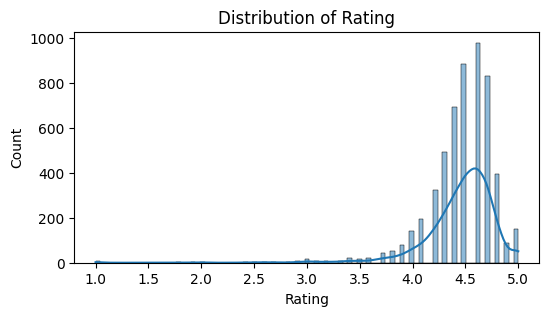

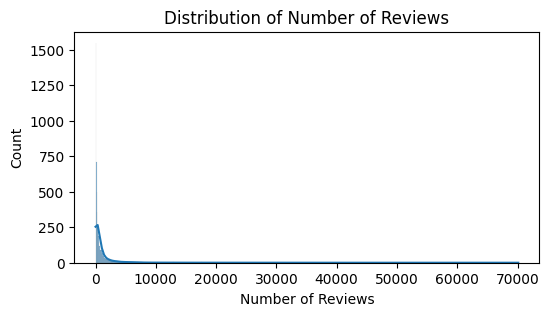

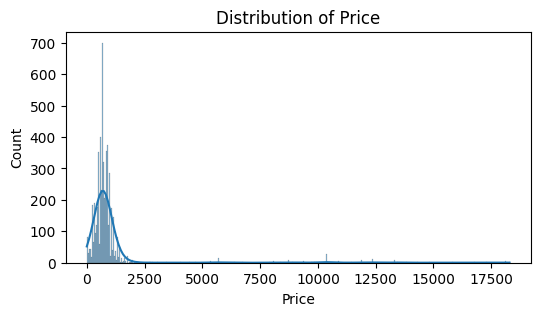

In [312]:
numerical_columns = ["Rating","Number of Reviews","Price"]
for col in numerical_columns:
    plt.figure(figsize=(6,3))
    sns.histplot(merged[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

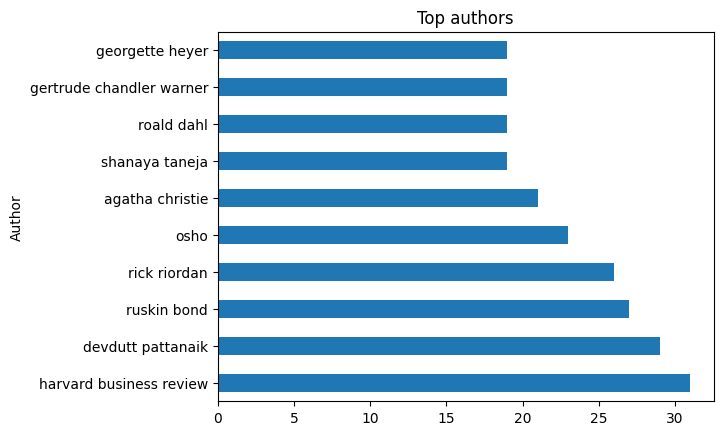

In [313]:
#authors 
merged["Author"].value_counts().head(10).plot(kind="barh", title="Top authors")
plt.show()

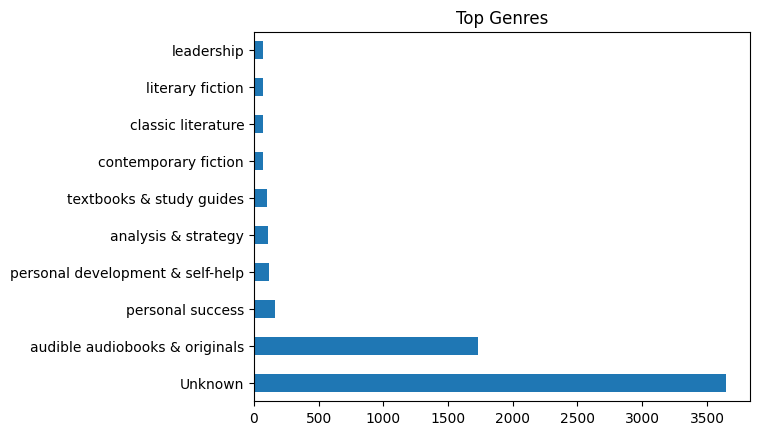

In [340]:
#Genres 
from collections import Counter
from itertools import chain

genres_list = merged["Genres"].str.split(",")
genres_counts = Counter(chain.from_iterable(genres_list))
pd.Series(genres_counts).sort_values(ascending=False).head(10).plot(kind="barh", title="Top Genres")
plt.show()

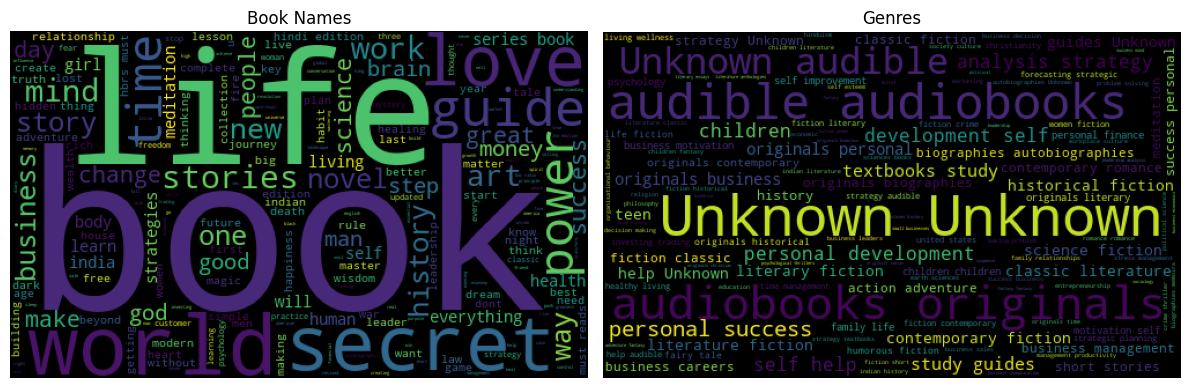

In [329]:
text = " ".join(merged["Book Name"].astype(str))
genres = " ".join(merged["Genres"].astype(str))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500, height=300, background_color="black").generate(text))
plt.title("Book Names")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500, height=300, background_color="black").generate(genres))
plt.title("Genres")
plt.axis("off")

plt.tight_layout()
plt.show()


#### Model training

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

